<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [2]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
import models.VAE_models.mmdvae as mmdvae_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
importlib.reload(mmdvae_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN
from models.VAE_models.mmdvae import MMDVAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [3]:
train_loader, _ = load_cifar10(batch_size=256)

100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]


In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

# **Train VaeGan**

In [5]:
%%capture
model = MMDVAE(beta=100.0).to(device)
model.apply(WeightsInitializer())

In [ ]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/MmdVae"
checkpointer = Checkpointer(checkpoint_dir,"MmdVae",1,False)
train = Train(model,150,train_loader,checkpointer,device)
train.load_checkpoint()
# torch.autograd.set_detect_anomaly(True)
train.train()

Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_epoch_100.pt
Epoch: 101  {'loss': 8.94816651149672, 'recon': 8.817985091890607, 'mmd': 0.001301814257779054}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_epoch_101.pt
Epoch: 102  {'loss': 8.93152563912528, 'recon': 8.801537226657478, 'mmd': 0.0012998840782677931}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_epoch_102.pt
Epoch: 103  {'loss': 8.916838110709676, 'recon': 8.792518211870778, 'mmd': 0.0012431987750980106}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_epoch_103.pt
Epoch: 104  {'loss': 8.902982458776357, 'recon': 8.781399099194275, 'mmd': 0.0012158332441945926}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_epoch_104.pt
Epoch: 105  {'loss': 8.898046211320526, 'recon': 8.769569805690221, 'mmd': 0.0012847639532361538}
Checkpoint saved: /content/drive/MyDrive/checkpoints_final/MmdVae/MmdVae_ep

In [7]:
images = model.sample(16)

In [ ]:
images.shape

torch.Size([10, 3, 32, 32])

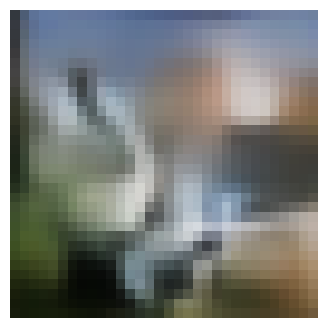

In [16]:
images = model.sample(16)
show_img(images[15])

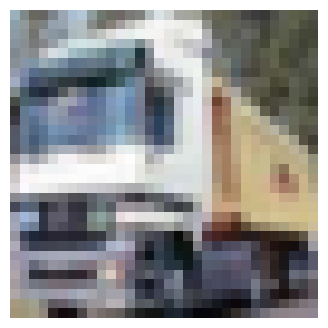

In [17]:
train_dataset = train_loader.dataset
img = train_dataset[1][0]
show_img(img)

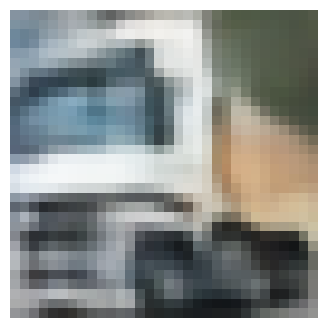

In [18]:
# print(img.unsqueeze(0) .shape)
model.eval()
with torch.no_grad():
  recon = model(img.unsqueeze(0).to(device))
show_img(recon[0])

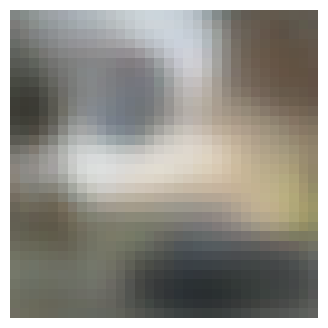

In [ ]:
# recon.shape
show_img(recon[0])
# indices.shape

In [ ]:
z = []
for x,_ in train_loader:
    z.append(model.encoder(x.to(device))[0])
z = torch.cat(z)

In [ ]:
z.mean(dim=0)

tensor([-7.1187e-01,  5.9387e-02,  7.1789e-02, -8.5871e-02,  2.0844e-01,
        -1.6599e-01,  2.5077e-01,  5.5593e-02,  1.4507e-01,  2.5865e-01,
        -4.1306e-02, -4.8887e-02, -5.3403e-02, -4.2876e-02, -4.9895e-01,
        -6.3468e-02,  4.0471e-01, -5.0234e-02,  9.4303e-02, -1.8874e-01,
         3.1554e-01, -1.6967e-02,  4.1268e-02,  2.8053e-02, -6.6830e-01,
         9.6820e-02,  7.0774e-02,  8.0894e-01,  5.1275e-01, -5.2718e-01,
        -1.0152e-02,  3.4032e-01, -6.5877e-02,  3.1094e-01,  1.1374e-01,
         7.5870e-04, -2.7655e-01, -6.1586e-02,  1.4842e-01,  5.4139e-02,
         4.0607e-01,  2.7213e-01,  8.8107e-02, -2.4810e-02,  2.5715e-01,
         6.4530e-02, -5.0508e-02, -8.1528e-02,  3.1513e-02, -4.8559e-03,
         1.8720e-02, -1.5852e-01, -1.3013e-02,  3.0998e-02,  9.0793e-03,
         2.0303e-01,  4.3942e-01,  4.1831e-02,  1.0096e-01,  1.9769e-02,
        -2.6447e-01, -6.3579e-02,  7.5658e-02, -2.3550e-02, -6.2754e-03,
         5.0698e-02, -8.3621e-02, -2.2321e-01, -4.4

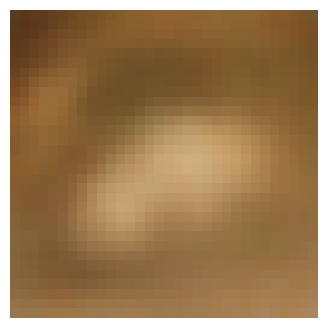

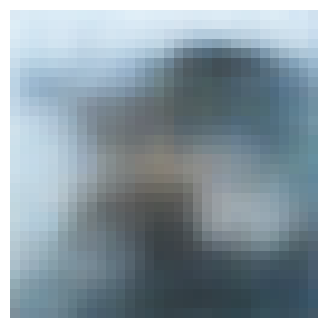

In [ ]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])